In [22]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# get adjusted closing prices of 20 selected companies with Quandl
quandl.ApiConfig.api_key = '5Av1EMy2LELvBBqUCpCg'
# removing top 5 selected = ['AAPL', 'FB', 'UNH', 'MA', 'INTC','GOOG','AMZN','MSFT','GOOGL','BRK_B','JNJ','V','JPM','HD','PEP']
selected = ['AAPL', 'FB', 'UNH', 'MA', 'INTC','GOOG','AMZN','MSFT','GOOGL','BRK_B','JNJ','V','PG','JPM','VZ','HD','T','PFE','MRK','PEP']
# removing bottom 5 selected = ['AAPL', 'FB', 'UNH',  'INTC','AMZN','BRK_B','JNJ','PG','JPM','VZ','HD','T','PFE','MRK','PEP']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'adj_close', 'ticker'] },
                        date = { 'gte': '2016-1-1', 'lte': '2018-12-31' }, paginate=True)

data1 = data.pivot('date','ticker','adj_close').reset_index()
data1.head()

ticker,date,AAPL,AMZN,BRK_B,FB,GOOG,GOOGL,HD,INTC,JNJ,...,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ
0,2016-01-04,101.783763,636.99,130.75,102.22,741.84,759.44,126.076040,31.810946,95.264931,...,93.359001,49.743593,52.181598,93.983484,29.614720,73.566646,31.109314,113.146472,74.736078,42.902925
1,2016-01-05,99.233131,633.79,131.25,102.73,742.58,761.53,125.460425,31.661204,95.663132,...,93.536246,50.378658,52.419653,94.630530,29.827908,73.801323,31.326671,113.360212,75.298820,43.492173
2,2016-01-06,97.291172,632.65,131.33,102.97,743.62,759.33,124.161862,30.959285,95.179602,...,92.108438,49.686721,51.467434,94.659076,29.299571,73.087904,31.281389,112.204070,74.311553,43.104017
3,2016-01-07,93.185040,607.94,129.48,97.92,726.39,741.00,120.622075,29.798780,94.070327,...,90.421181,49.250707,49.677262,92.841637,29.104920,72.449582,30.776258,108.900807,72.850399,42.867286
4,2016-01-08,93.677776,607.05,128.33,97.33,714.47,730.91,119.179227,29.489936,93.065343,...,88.694456,48.416591,49.829617,92.499083,28.734157,71.313743,30.803810,107.025720,71.951986,42.450639


In [18]:
corr_df = data1.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()

corr_df

ticker,AAPL,AMZN,BRK_B,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ
ticker,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.890084,0.933134,0.960857,0.957868,0.959153,0.916465,0.835756,0.894819,0.941640,0.932200,0.442956,0.956610,0.886275,0.735005,0.698413,0.068044,0.956031,0.948852,-0.106878
AMZN,0.890084,1.000000,0.920321,0.898116,0.944130,0.937166,0.913388,0.931332,0.826393,0.919505,0.962993,0.293561,0.958354,0.772161,0.800589,0.452098,0.083433,0.931668,0.952630,0.021327
BRK_B,0.933134,0.920321,1.000000,0.927641,0.941118,0.935850,0.950067,0.891602,0.887965,0.982133,0.954310,0.417275,0.965849,0.826807,0.815474,0.626256,0.191054,0.980475,0.953878,0.123002
FB,0.960857,0.898116,0.927641,1.000000,0.954355,0.954643,0.923602,0.834813,0.940614,0.913700,0.941733,0.433931,0.947741,0.902989,0.811416,0.718628,0.073205,0.962152,0.967759,-0.014391
GOOG,0.957868,0.944130,0.941118,0.954355,1.000000,0.999245,0.957383,0.890105,0.885756,0.935376,0.966939,0.337282,0.983042,0.848455,0.764922,0.576848,0.009691,0.962756,0.974210,-0.036194
GOOGL,0.959153,0.937166,0.935850,0.954643,0.999245,1.000000,0.951466,0.884796,0.887728,0.931900,0.959988,0.354894,0.979278,0.854658,0.758855,0.591118,0.014133,0.958807,0.969020,-0.044300
HD,0.916465,0.913388,0.950067,0.923602,0.957383,0.951466,1.000000,0.871833,0.884063,0.920066,0.943852,0.281657,0.952373,0.831132,0.826199,0.562917,0.086695,0.955202,0.958775,0.121007
INTC,0.835756,0.931332,0.891602,0.834813,0.890105,0.884796,0.871833,1.000000,0.771543,0.881928,0.918456,0.210341,0.927572,0.671000,0.791557,0.429915,0.090220,0.883473,0.900798,0.164586
JNJ,0.894819,0.826393,0.887965,0.940614,0.885756,0.887728,0.884063,0.771543,1.000000,0.856399,0.852742,0.533082,0.869619,0.942231,0.876159,0.785609,0.221527,0.925038,0.894886,0.104449


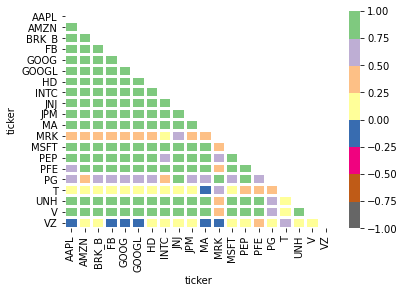

In [53]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#above code taken from documentation
color_map=plt.cm.get_cmap('Accent_r')
# rcolor_map=colormap.reversed
heat_map=seaborn.heatmap(corr_df,cmap=color_map,linewidths=2,vmin=-1.0,vmax=1.0,mask=mask)
plt.show()

In [54]:
#helped by my friend devansh dixit
corr=[]
for ticker in selected:
    corr.append(corr_df.nlargest(2,ticker,keep='first')[ticker][1])
# print(corr)

corr=np.array(corr)
sort_index=np.argsort(corr)
for i in range(len(selected)):
    print(selected[sort_index[i]])


T
VZ
MRK
PG
PFE
INTC
PEP
JNJ
HD
AAPL
AMZN
FB
UNH
JPM
BRK_B
MSFT
V
MA
GOOG
GOOGL


In [97]:
# selected = ['AAPL', 'FB', 'UNH', 'MA', 'INTC','GOOG','AMZN','MSFT','GOOGL','BRK_B','JNJ','V','PG','JPM','VZ','HD','T','PFE','MRK','PEP']
#1 0.69 ( without removing)
#2 1.23( removing top 5)
#3 0.6421( removing bottom 5)
# T
# VZ
# MRK
# PG
# PFE
# INTC
# PEP
# JNJ
# HD
# AAPL
# AMZN
# FB
# UNH
# JPM
# BRK_B
# MSFT
# V
# MA
# GOOG
# GOOGL

weight=np.zeros(len(selected),dtype=float)
weight.fill(1/len(selected))
port_var=np.dot(weight.T,np.dot(corr_df,weight))
port_var

0.6959315581350007

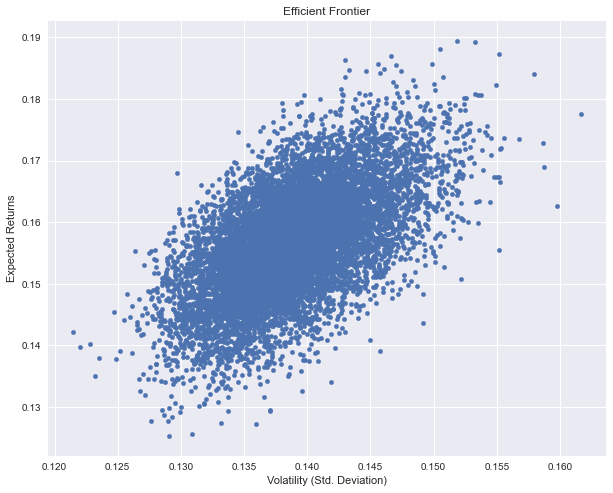

In [26]:

# # import needed modules
# import quandl
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # get adjusted closing prices of 5 selected companies with Quandl
# quandl.ApiConfig.api_key = '5Av1EMy2LELvBBqUCpCg'
# # selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
# selected = ['AAPL', 'FB', 'UNH', 'MA', 'INTC','AMZN','MSFT','GOOGL','BRK_B','JNJ','V','PG','JPM','VZ','HD','T','PFE','MRK','PEP','GOOG']
# data = quandl.get_table('WIKI/PRICES', ticker = selected,
#                         qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                         date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# # reorganise data pulled by setting date as index with
# # columns of tickers and their corresponding adjusted prices
# clean = data.set_index('date')
# table = clean.pivot(columns='ticker')

# # calculate daily and annual returns of the stocks
# returns_daily = table.pct_change()
# returns_annual = returns_daily.mean() * 250

# # get daily and covariance of returns of the stock
# cov_daily = returns_daily.cov()
# cov_annual = cov_daily * 250

# # empty lists to store returns, volatility and weights of imiginary portfolios
# port_returns = []
# port_volatility = []
# stock_weights = []

# # set the number of combinations for imaginary portfolios
# num_assets = len(selected)
# num_portfolios = 10000

# # populate the empty lists with each portfolios returns,risk and weights
# for single_portfolio in range(num_portfolios):
#     weights = np.random.random(num_assets)
#     weights /= np.sum(weights)
#     returns = np.dot(weights, returns_annual)
#     volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
#     port_returns.append(returns)
#     port_volatility.append(volatility)
#     stock_weights.append(weights)

# # a dictionary for Returns and Risk values of each portfolio
# portfolio = {'Returns': port_returns,
#              'Volatility': port_volatility}

# # extend original dictionary to accomodate each ticker and weight in the portfolio
# for counter,symbol in enumerate(selected):
#     portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# # make a nice dataframe of the extended dictionary
# df = pd.DataFrame(portfolio)

# # get better labels for desired arrangement of columns
# column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# # reorder dataframe columns
# df = df[column_order]

# # plot the efficient frontier with a scatter plot
# plt.style.use('seaborn')
# df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
# plt.xlabel('Volatility (Std. Deviation)')
# plt.ylabel('Expected Returns')
# plt.title('Efficient Frontier')
# plt.show()
